In [31]:
# Setting up
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

# ignore warning 
import warnings
warnings.filterwarnings("ignore")

In [18]:
# get data frames previous 4 seasons and current season.
df_1415 = pd.read_csv('./data/1415.csv')
df_1516 =  pd.read_csv('./data/1516.csv')
df_1617 = pd.read_csv('./data/1617.csv')
df_1718 = pd.read_csv('./data/1718.csv')
df_1819 = pd.read_csv('./data/1819.csv')
df_total = df_1415.append(df_1516).append(df_1617).append(df_1718).append(df_1819)

In [19]:
df_total = df_total[['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HS', 'AS', 'HST', 'AST', 'HY', 'AY', 'HR', 'AR']]
df_total.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,HY,AY,HR,AR
0,Arsenal,Crystal Palace,2.0,1.0,H,14.0,4.0,6.0,2.0,2.0,2.0,0.0,1.0
1,Leicester,Everton,2.0,2.0,D,11.0,13.0,3.0,3.0,1.0,1.0,0.0,0.0
2,Man United,Swansea,1.0,2.0,A,14.0,5.0,5.0,4.0,2.0,4.0,0.0,0.0
3,QPR,Hull,0.0,1.0,A,19.0,11.0,6.0,4.0,1.0,2.0,0.0,0.0
4,Stoke,Aston Villa,0.0,1.0,A,12.0,7.0,2.0,2.0,0.0,3.0,0.0,0.0


In [21]:
def clean_data(df):
    data = df[['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HS', 'AS', 'HST', 'AST']]
    data['HSGR'] = data['FTHG']/data['HS']
    data['ASGR'] = data['FTAG']/data['AS']
    data = data.replace([np.inf, -np.inf], 0)
    bet_home = df[['B365H','BWH','IWH','PSH','VCH','WHH']].mean(axis=1)
    bet_draw = df[['B365D','BWD','IWD','PSD','VCD','WHD']].mean(axis=1)
    bet_away = df[['B365A','BWA','IWA','PSA','VCA','WHA']].mean(axis=1)
    
    
    data['odd_home'] = bet_home
    data['odd_draw'] = bet_draw
    data['odd_away'] = bet_away
    
    data.dropna()
    
    return data

In [36]:
data_1415 = clean_data(pd.read_csv('./data/1415.csv'))
data_1415.drop(data_1415.tail(1).index,inplace=True)
data_1516 = clean_data(pd.read_csv('./data/1516.csv'))
data_1617 = clean_data(pd.read_csv('./data/1617.csv'))
data_1718 = clean_data(pd.read_csv('./data/1718.csv'))
data_1819 = clean_data(pd.read_csv('./data/1819.csv'))

### Data Distribution

In [72]:
## get distribution of the result
def getDistResult(data):
    arr = [0,0,0]
    for index, row in data.iterrows():
        if row.FTR == 'H':
            arr[0] += 1
        elif row.FTR == 'D':
            arr[1] += 1
        else:
            arr[2] += 1
    return arr


def average_betting(df):
    betting_accuracies = []
    for index, row in df.iterrows():
        if(row['FTR'] == 'H' and row['odd_home'] < row['odd_away'] and row['odd_home'] < row['odd_draw']):
            betting_accuracies.append(1)
        elif(row['FTR'] == 'D' and row['odd_draw'] < row['odd_away'] and row['odd_draw'] < row['odd_home']):
            betting_accuracies.append(1)
        elif(row['FTR'] == 'A' and row['odd_away'] < row['odd_home'] and row['odd_away'] < row['odd_draw']):
            betting_accuracies.append(1)
        else:
            betting_accuracies.append(0)
        
    return np.mean(betting_accuracies)


def accuracy(df):
    home = 0
    draw = 0
    away = 0
    for index, row in df.iterrows():
        if(row['odd_home'] < row['odd_away'] and row['odd_home'] < row['odd_draw']):
            home = home+1
        elif(row['odd_draw'] < row['odd_away'] and row['odd_draw'] < row['odd_home']):
            draw = draw+1
        else:
            away = away+1
            
    return [home/len(df), draw/len(df), away/len(df)]

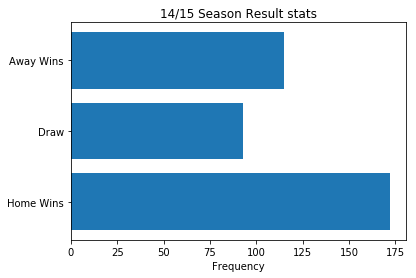

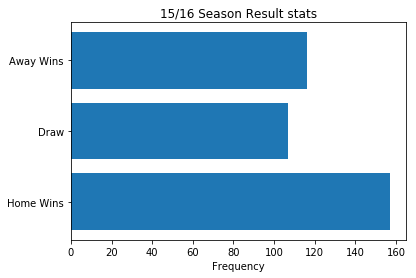

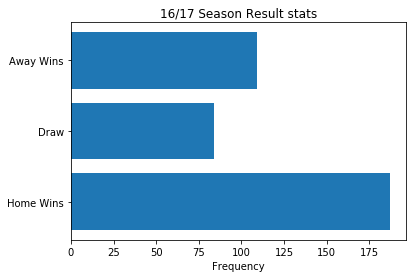

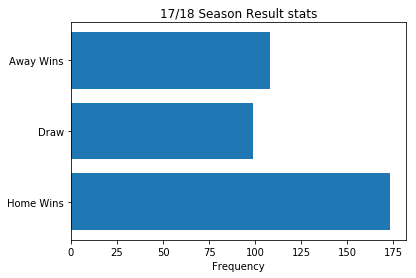

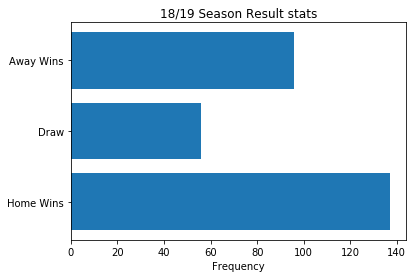

In [73]:
# by season home or away
result = ['Home Wins', 'Draw', 'Away Wins']
plt.barh(result, getDistResult(data_1415))
plt.xlabel('Frequency')
plt.title('14/15 Season Result stats')
plt.show()

plt.barh(result, getDistResult(data_1516))
plt.xlabel('Frequency')
plt.title('15/16 Season Result stats')
plt.show()

plt.barh(result, getDistResult(data_1617))
plt.xlabel('Frequency')
plt.title('16/17 Season Result stats')
plt.show()

plt.barh(result, getDistResult(data_1718))
plt.xlabel('Frequency')
plt.title('17/18 Season Result stats')
plt.show()

plt.barh(result, getDistResult(data_1819))
plt.xlabel('Frequency')
plt.title('18/19 Season Result stats')
plt.show()


In [6]:
# "Arsenal"
# "Man Utd"
# "Man city"
# "Tottenham"
# "Liverpool"
#  "Chelsea"


In [ ]:
time = [average_betting(data_1415),
        average_betting(data_1516), 
        average_betting(data_1617), 
        average_betting(data_1718), 
        average_betting(data_1819)]